# Lesson: Data Preparation

Plan --> Acquire --> <b>Prepare</b> --> Explore --> Model --> Deliver

<b>Goal</b>: Prepare, tidy, and clean the data so that it is ready for exploration and analysis.

<b>Input</b>: 1 or more dataframes acquired through the "acquire" step.

<b>Output</b>: 1 dataset split into 3 samples in the form of dataframes: train, validate & test.

<b>Artifact</b>: prepare.py

### Preparation Steps:
1. Inspect and Summarize
2. Clean
3. Split

<hr style="border:2px solid gray">

### Overfitting:
Train/Validate/Test
<br>
Model Training
<br>
- An overfit model makes poor (relativelty) predictions on out-of-sample data.
- Out-of-sample data can be the validation and test sets.
<br> 

<div class="alert alert-block alert-info">
<b>Instructor Note:</b> 
    <br>
    <u>Real worlds example of "overfitting"</u>
    <br>
We make a curriculum to teach data science that fits perfectly for the current class you are teaching. It doesn't account for the students for a different cohort (validate & test sets). 
    </div>

<hr style="border:1.5px solid black">

## Step 1: Inspect and Summarize

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# train test split from sklearn
from sklearn.model_selection import train_test_split
# imputer from sklearn
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

# our own acquire script:
import acquire 

In [2]:
# Importing our data
df = acquire.get_titanic_data()

In [3]:
# Take a look at the data
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [4]:
# Review summary statistics of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,891.0,445.000000,257.353842,0.00,222.5000,445.0000,667.5,890.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


Let's dig deeper into each of the fields
- For numeric columns, we can look as histograms
- For categorical columns, we can look at ```value_counts()```

In [5]:
#let's take a look at all the columns that are not object
df.select_dtypes(exclude='object').columns.to_list()

['passenger_id',
 'survived',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'alone']

In [6]:
#we can save those numeric columns to a new variable
num_col = df.select_dtypes(exclude='object').columns.to_list()

In [7]:
#another way to complete this task
numcols = [col for col in df.columns if df[col].dtype != 'O']

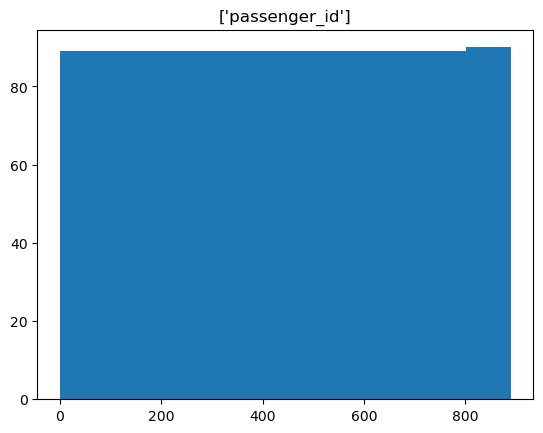

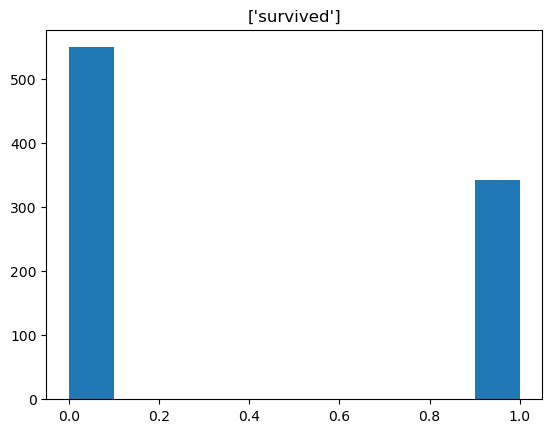

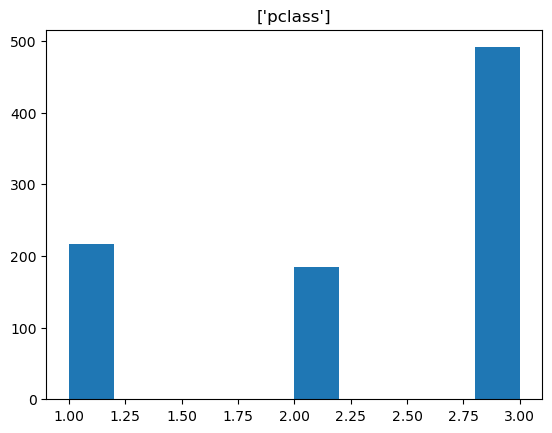

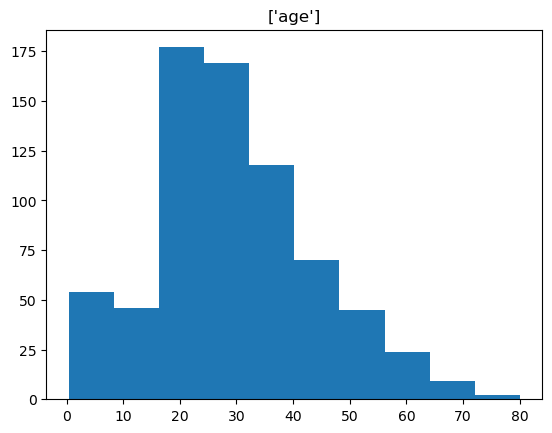

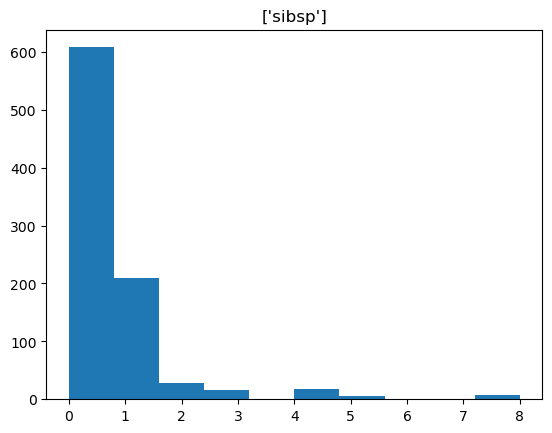

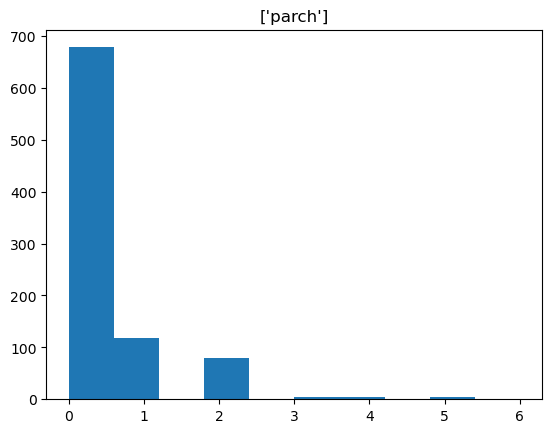

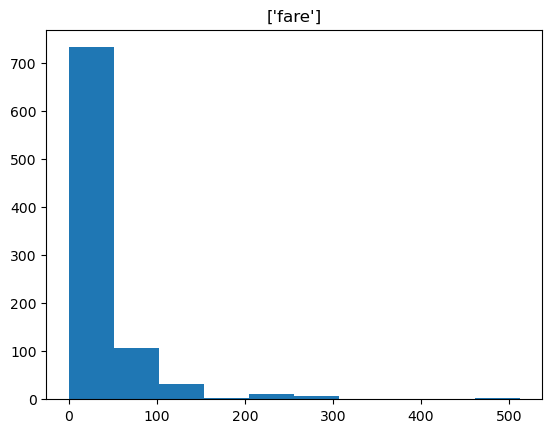

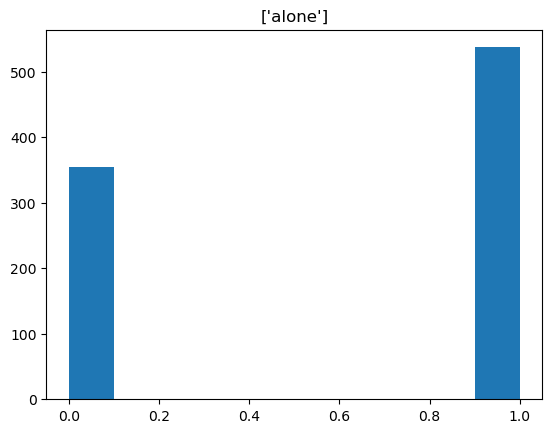

In [8]:
#we can then create a 'for loop' of the numeric columns histograms
for col in num_col:
    plt.hist(df[col])
    plt.title([col])
    plt.show()

<div class="alert alert-danger" role="alert">
    <div class="row vertical-align">
        <div class="col-xs-1 text-center">
            <i class="fa fa-exclamation-triangle fa-2x"></i>
        </div>
        <div class="col-xs-11">
                <strong> IMPORTANT NOTE:</strong>
            <br>
            Visualizations create through a loop should <b>only</b> be part of your personal exploration. Do not include this much noise in a report or presentation!!!
</div>

<b>Now, Let's do the same for categorical columns</b>

In [9]:
#let's take a look at all the columns that are object
df.select_dtypes(include='object').columns.to_list()

['sex', 'embarked', 'class', 'deck', 'embark_town']

In [10]:
#we can save those numeric columns to a new variable
cat_col = df.select_dtypes(include='object').columns.to_list()

In [11]:
#another way to complete this task
catcols = [col for col in df.columns if df[col].dtype == 'O']

In [12]:
# Describe the object columns
for col in catcols:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print("--------")
    print(df[col].value_counts(normalize=True, dropna=False))
    print("=================")

Column: sex
male      577
female    314
Name: sex, dtype: int64
--------
male      0.647587
female    0.352413
Name: sex, dtype: float64
Column: embarked
S    644
C    168
Q     77
Name: embarked, dtype: int64
--------
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
Column: class
Third     491
First     216
Second    184
Name: class, dtype: int64
--------
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
Column: deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
--------
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
Column: embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
--------
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64


<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
    <br>
    <b>When inspecting our data we will ask several questions:</b>
    <br>  
1. Do we have duplicate data?
     <br>
2. Do we have null data?
     <br>
3. Do we have outliers?
     <br>
4. Do we have erroneous values?
     <br>
5. Are the datatypes correct?
     <br>
6. Is the text normalized?
     <br>
7. Do we have tidy data?
     </div>

#### 1. Do we have duplicate data?

In [13]:
# Look at relationship between embarked and embark_town
pd.crosstab(df.embarked, df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


```embarked``` and ```embark_town``` contain identical information

In [14]:
# Look at the relationship between class and pclass
pd.crosstab(df['class'], df.pclass) 

pclass,1,2,3
class,,,
First,216,0,0
Second,0,184,0
Third,0,0,491


```class``` and ```pclass``` contain identical information

In [15]:
# Look at the relationship between sibsp and alone
pd.crosstab(df['sibsp'], df['alone'])

alone,0,1
sibsp,,
0,71,537
1,209,0
2,28,0
3,16,0
4,18,0
5,5,0
8,7,0


<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
    <br>
    <b>Thought to discuss with class:</b>
    <br>  
71 passengers had no siblings or spouses aboard, but were not marked as being alone. Perhaps they are children? We could look at parch for this. Something to explore later...
     </div>

In [16]:
# are there any duplicates in passenger_id?
df.passenger_id.duplicated().sum()

0

<b>2. Do we have null data?</b>

In [17]:
#look at null counts
df.isnull().sum() [df.isnull().sum() > 0]

age            177
embarked         2
deck           688
embark_town      2
dtype: int64

#### Null Data Takeaways:
- There is a substantial number of nulls in deck
- There are 2 nulls in ```embarked```
- There are 100+ nulls in ```age```

<b>3. Do we have outliers?</b>
<br>
By using the histograms above, we can determine that there are a few outliers potentially in ```sibsp``` & ```parch```, but without specific domain knowledge related to the titanic, I am not going to remove those outliers or snap them/compress them. 
<br>
<br>
I will ignore them for now.

<b>4. Do we have erroneous values?</b>

In [18]:
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


No erroneous values detected.

<b>5. Are the datatypes correct?</b>

In [19]:
#look at dtypes
df.dtypes

passenger_id      int64
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class            object
deck             object
embark_town      object
alone             int64
dtype: object

<b>6. Is the text normalized?</b>

No text normalization issues detected.

<b>7. Do we have tidy data?</b>

In [20]:
# Each column should only represent one variable
# Each row should be one observation (passenger)
df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Inspect and Summarize- Takeaways
<b>Continuous Variables</b>
<br>
```age``` & ```fare```

<b>Categorical Variables</b>

```survived```, ```pclass```, ```sex```, ```sibsp```, ```parch```, ```embarked```, ```class```, ```deck```, ```embark_town```, ```alone```
<br>
<br>

<b>Notes</b>:
- ```passenger_id``` is effectively an index and provides no predictive quality
- ```survived``` is our target variable
- ```embarked``` and ```embark_town``` seem to be identical information (not identical data, but identical info...what's the difference?)
- ```pclass``` and ```class``` also seem to be identical
- ```deck``` has a substantial amount of nulls.

<hr style="border:1.5px solid black">
<hr style="border:1.5px solid black">

## Step 2: Clean

In [21]:
#These are the columns we want to drop
to_drop =['class', 'embarked', 'deck', 'passenger_id','age']

<div class="alert alert-block alert-info">
    <b>Instructor Note:</b> 
    <br>
The machine learning models can only accept numeric values. Therefore, we will remove the class column instead the pclass column.
</div>


In [22]:
#Now we are going to drop them
#using 'inplace' we can make sure these changes are saved on our notebook 
df.drop(columns = to_drop, inplace=True)

In [23]:
#Make sure those columns are dropped
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


In [24]:
#Let's find where the null values are
df.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    2
alone          0
dtype: int64

In [25]:
#we have 2 nulls in embark town
#we can get the count of each location to see which has most
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [26]:
#Let's fill those 2 nulls with the most common embark town
df['embark_town'].fillna('Southampton', inplace=True)

In [27]:
#make sure we got rid of those nulls
df.isna().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embark_town    0
alone          0
dtype: int64

In [28]:
#Let's look at our dataframe all clean
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone
0,0,3,male,1,0,7.2500,Southampton,0
1,1,1,female,1,0,71.2833,Cherbourg,0
2,1,3,female,0,0,7.9250,Southampton,1
3,1,1,female,1,0,53.1000,Southampton,0
4,0,3,male,0,0,8.0500,Southampton,1


<hr style="border:1.5px solid black">

### Encoding: Turning Categorical Values into Boolean Values (0,1)
Machine Learning requires all input to be numeric

- We have two options: simple encoding or one-hot encoding

<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
    <br>
    <b>Encoding</b> -- turning a string into a number
    <br>
    <br>
<b>simple encoding</b> -- associate each unique value with a number
<br>
-- use the label encoder when the categories have an inherit order
    <br> 
    <b>one-hot encoding</b> (get_dummies) -- turn each unique value into a separate column with either 1 or 0
<br>
-- use one-hot encoding when there is no order
     </div>

<b>Encoding steps</b>
1. Make a dataframe out of "dummy" columns
2. Concatenate our dummy dataframe to our original dataframe

<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
    <br>
    <b>get_dummies parameters:</b>
    <br>
    <br>
    <b>dummy_na</b>: bool, default False
    <br>
Add a column to indicate NaNs, if False NaNs are ignored.
    <br>
    <br>   
    <b>drop_first</b>: bool, default False
    <br>
Whether to get k-1 dummies out of k categorical levels by removing the first level.
    </div>

<b>Step 1: Make a dataframe out of "dummy" columns</b>

In [29]:
dummy_df = pd.get_dummies(df[['sex', 'pclass', 'embark_town']], dummy_na=False, drop_first=[True])

In [30]:
dummy_df.head()

,pclass,sex_male,embark_town_Queenstown,embark_town_Southampton
0,3,1,0,1
1,1,0,0,0
2,3,0,0,1
3,1,0,0,1
4,3,1,0,1


<b>Step 2: Concatenate my dummy_df to the original dataframe

In [31]:
df = pd.concat([df, dummy_df], axis=1)
df.head()

,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,pclass,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,male,1,0,7.2500,Southampton,0,3,1,0,1
1,1,1,female,1,0,71.2833,Cherbourg,0,1,0,0,0
2,1,3,female,0,0,7.9250,Southampton,1,3,0,0,1
3,1,1,female,1,0,53.1000,Southampton,0,1,0,0,1
4,0,3,male,0,0,8.0500,Southampton,1,3,1,0,1


<hr style="border:1.5px solid black">

### Create our function

<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
    We will go one line at a time from our data cleaning and add it into our function
    </div>

In [32]:
def clean_titanic_data(df):
    '''
    Takes in a titanic dataframe and returns a cleaned dataframe
    Arguments: df - a pandas dataframe with the expected feature names and columns
    Return: clean_df - a dataframe with the cleaning operations performed on it
    '''
    # Drop duplicates
    df.drop_duplicates(inplace=True)
    # Drop columns 
    columns_to_drop = ['embarked', 'pclass', 'passenger_id', 'deck']
    df = df.drop(columns = columns_to_drop)
    # encoded categorical variables
    dummy_df = pd.get_dummies(df[['sex', 'class', 'embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    return df

In [33]:
#Let's make sure that our data acquisition works
test_dataframe = acquire.get_titanic_data()

#Take a look at that data
test_dataframe.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [34]:
#Now let's use the cleaning function that we created on our data
clean_df = clean_titanic_data(test_dataframe)

#Take a look at that data
clean_df.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
0,0,male,22.0,1,0,7.2500,Third,Southampton,0,1,0,1,0,1
1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,0,1,0,1
3,1,female,35.0,1,0,53.1000,First,Southampton,0,0,0,0,0,1
4,0,male,35.0,0,0,8.0500,Third,Southampton,1,1,0,1,0,1


We still have two columns with nulls:

```age```
```embark_town```
<br>

<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
As a general practice, wait until after the Train, Validate, Test Split before filling nulls.

<b>WHY?</b>
<br>
    There can be cases where it is okay to fill nulls before splitting. We will talk about those cases after we get through creating the Train, Validate, Test split.
    </div>

<hr style="border:1.5px solid black">
<hr style="border:1.5px solid black">

## Step 3: Train, Validate, Test Split

Sklearn allows us to split our data easily:
<br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

![image](tvt_split.png)

- <b>train</b>: data to explore, clean, scale, and fit

- <b>validate, test</b>: represents unseen data

- <b>validate</b>: confirm our top models have not overfit

- <b>test</b>: test our top model -- ONLY USED ON 1 MODEL!

<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
    <b>Arguments for train_test_split </b>
    <br>
    <br>
    <b>stratify</b>: array-like, default=None
    <br>
If not None, data is split in a stratified fashion, using this as the class labels. 
    <br>
    <br>   
    <b>train_size</b>: float or int, default=None
       <br>
If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the train split. If int, represents the absolute number of train samples. If None, the value is automatically set to the complement of the test size. Typically 0.8
    <br>
    </div>

In [35]:
clean_df.shape

(891, 14)

In [36]:
seed =1226

train, test = train_test_split(clean_df,
                               train_size = 0.8,
                               stratify = clean_df.survived,
                               random_state=seed)

In [37]:
#Let's make sure that train and test are the correct size (80/20)
train.shape, test.shape

((712, 14), (179, 14))

In [38]:
#Look at the train dataset
train.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
405,0,male,34.0,1,0,21.0000,Second,Southampton,0,1,1,0,0,1
151,1,female,22.0,1,0,66.6000,First,Southampton,0,0,0,0,0,1
362,0,female,45.0,0,1,14.4542,Third,Cherbourg,0,0,0,1,0,0
611,0,male,NaN,0,0,7.0500,Third,Southampton,1,1,0,1,0,1
618,1,female,4.0,2,1,39.0000,Second,Southampton,0,0,1,0,0,1


In [39]:
train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=seed)

In [40]:
#Let's make sure that train and test are the correct size
train.shape, validate.shape, test.shape

((498, 14), (214, 14), (179, 14))

<b>We can turn our split into a function</b>

In [41]:
def split_data(df):
    seed = 1226
    train, test = train_test_split(clean_df,
                               train_size = 0.8,
                               stratify = clean_df.survived,
                               random_state=seed)
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=seed)
    return train, validate, test

<hr style="border:1.5px solid black">

## Option for Missing Values: Impute

<div class="alert alert-block alert-info">
    <b>Instructor Note:</b>
    <br>
Impute: Assign a value to something by inference
    <br>
    <br>
Strategies for imputing:
 <br>
 <br>
fill with 0
<br>
fill with the average
<br>
fill with the median
<br>
fill with subgroup mean
<br>
fill with most frequent value
<br>
build a model to predict missing values
    </div>

We can impute values using the mean, median, mode (most frequent), or a constant value. We will use sklearn.imputer.SimpleImputer to do this.

1. Create the imputer object, selecting the strategy used to impute (mean, median or mode (strategy = 'most_frequent').
2. Fit to train. This means compute the mean, median, or most_frequent (i.e. mode) for each of the columns that will be imputed. Store that value in the imputer object.
3. Transform train: fill missing values in train dataset with that value identified
4. Transform test: fill missing values with that value identified


#### #1. Create the ```SimpleImputer``` object, which we will store in the variable ```imputer```. In the creation of the object, we will specify the strategy to use (```mean```, ```median```, ```most_frequent```). Essentially, this is creating the instructions and assigning them to a variable we will reference.

In [42]:
# Define the thing using (strategy = 'most_frequent')
imputer = SimpleImputer(strategy='mean', missing_values=np.nan)

In [43]:
type(imputer)

sklearn.impute._base.SimpleImputer

#### #2. ```Fit``` the imputer to the columns in the training df. This means that the imputer will determine the ```most_frequent``` value, or other value depending on the strategy called, for each column.

In [44]:
#get fresh titanic data
df1 = acquire.get_titanic_data()

In [45]:
#look at how many nulls we have in the age column
df1.age.isnull().sum()

177

In [46]:
#split the data using the function we created above
train, validate, test = split_data(df1)

In [47]:
print('Nulls in age column before imputing\n')
print(f'train nulls: {train.age.isnull().sum()}')
print(f'validate nulls: {validate.age.isnull().sum()}')
print(f'test nulls: {test.age.isnull().sum()}')

Nulls in age column before imputing

train nulls: 102
validate nulls: 40
test nulls: 35


In [48]:
# fit the thing using imputer.fit()
train[['age']] = imputer.fit(train[['age']])

validate[['age']] = imputer.fit(validate[['age']])

test[['age']] = imputer.fit(test[['age']])

In [49]:
# Validate that there are no longer any Null values in embark_town.
print('Nulls in age column after imputing\n')
print(f'train nulls: {train.age.isnull().sum()}')
print(f'validate nulls: {validate.age.isnull().sum()}')
print(f'test nulls: {test.age.isnull().sum()}')

Nulls in age column after imputing

train nulls: 0
validate nulls: 0
test nulls: 0


#### #3. It will store that value in the imputer object to use upon calling ```transform```. We will call ```transform``` on each of our samples to fill any missing values.

In [50]:
#get fresh titanic data again
df2 = acquire.get_titanic_data()

In [51]:
#look at how many nulls we have in the age column
df2.age.isnull().sum()

177

In [52]:
#split the data using the function we created above
train, validate, test = split_data(df2)

In [53]:
# Validate that there are no longer any Null values in embark_town.
print('Nulls in age column before imputing\n')
print(f'train nulls: {train.age.isnull().sum()}')
print(f'validate nulls: {validate.age.isnull().sum()}')
print(f'test nulls: {test.age.isnull().sum()}')

Nulls in age column before imputing

train nulls: 102
validate nulls: 40
test nulls: 35


In [54]:
# Use the thing using imputer.transform()

train[['age']] = imputer.transform(train[['age']])

validate[['age']] = imputer.transform(validate[['age']])

test[['age']] = imputer.transform(test[['age']])

In [55]:
# Validate that there are no longer any Null values in embark_town.
print('Nulls in age column after imputing\n')
print(f'train nulls: {train.age.isnull().sum()}')
print(f'validate nulls: {validate.age.isnull().sum()}')
print(f'test nulls: {test.age.isnull().sum()}')

Nulls in age column after imputing

train nulls: 0
validate nulls: 0
test nulls: 0


Create a function that will run through all of these steps, when I provide a train and test dataframe, a strategy, and a list of columns.

In [56]:
def impute_age(train, validate, test):
    '''
    Imputes the mean age of train to all three datasets
    '''
    imputer = SimpleImputer(strategy='mean', missing_values=np.nan)
    imputer = imputer.fit(train[['age']])
    train[['age']] = imputer.transform(train[['age']])
    validate[['age']] = imputer.transform(validate[['age']])
    test[['age']] = imputer.transform(test[['age']])
    return train, validate, test

Blend the clean, split and impute functions into a single prep_data() function.

In [57]:
def prep_titanic_data(df): 
    df = clean_titanic_data(df)
    train, test = train_test_split(df,
                               train_size = 0.8,
                               stratify = df.survived,
                               random_state=1234)
    train, validate = train_test_split(train,
                                  train_size = 0.7,
                                  stratify = train.survived,
                                  random_state=1234)
    train, validate, test = impute_age(train, validate, test)
    return train, validate, test

In [58]:
df = acquire.get_titanic_data()
train, validate, test = prep_titanic_data(df)
train.head()

,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,sex_male,class_Second,class_Third,embark_town_Queenstown,embark_town_Southampton
301,1,male,30.189296,2,0,23.2500,Third,Queenstown,0,1,0,1,1,0
290,1,female,26.000000,0,0,78.8500,First,Southampton,1,0,0,0,0,1
779,1,female,43.000000,0,1,211.3375,First,Southampton,0,0,0,0,0,1
356,1,female,22.000000,0,1,55.0000,First,Southampton,0,0,0,0,0,1
147,0,female,9.000000,2,2,34.3750,Third,Southampton,0,0,0,1,0,1
